In [1]:
import pandas as pd
import os
import glob
import email
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk import word_tokenize, sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
import string
import re
import nltk
import datetime as dt
from PIL import Image
from string import digits
import networkx as nx


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = "/content/drive/MyDrive/Capstone/maildir"

In [ ]:
class read_all_files:
    def __init__(self):
        self.res = []
        self.path = []
        # self.count = 0

    def read_emails(self, path):        
        os.chdir(path)  # enter target path, like cd in cmd
        file_lists = os.listdir()  # get all the files and file lists in current directory
        for file in file_lists:  # visit all the files in the list
            if file != '.DS_Store':
              if os.path.isfile(file):  # read file 
                    final_path = os.getcwd()+os.sep+file
                    self.path.append(final_path)
                    with open(final_path,encoding = 'utf8',errors = 'ignore') as f:
                        self.res.append(f.read())
              if os.path.isdir(file):  # if it's a directory, recursively call the function
                  self.read_emails(file)
        # return to the previous path to continue visiting
        os.chdir('..')


In [ ]:
E = read_all_files()

start_time = time.time()
E.read_emails('/content/drive/MyDrive/Capstone/maildir')
end_time = time.time()
end_time - start_time

In [ ]:
emails = list(map(email.parser.Parser().parsestr,E.res))

In [ ]:
def get_raw_text(emails):
    email_text = []
    for email in emails.walk():
        if email.get_content_type() == 'text/plain':
            email_text.append(email.get_payload())
    return ''.join(email_text)

In [ ]:
start_time = time.time()
headings  = emails[0].keys()
df = pd.DataFrame()
# Goes through each email and grabs info for each key
# doc['From'] grabs who sent email in all emails
for key in headings:
    df[key] = [doc[key] for doc in emails]

df['body'] = list(map(get_raw_text, emails))
df['file'] = E.path
end_time = time.time()




In [ ]:
end_time - start_time

In [ ]:
table = 100*df.isna().sum()/df.shape[0]


In [ ]:
df.to_csv("/content/drive/MyDrive/Capstone/maildir/table_sample.csv")

# Text Data Cleaning

In [ ]:
df = pd.read_csv(data_path+"_table.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
nltk.download('all')

In [ ]:
def lemmatize_text(text):
    if str(text)=='nan':
        # print
        return ''
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    # print(text)
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

In [ ]:
def remove_Stopwords(text):
    if text=='nan':
        return
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    sentence = [w.replace('\n',"") for w in words if not w in stop_words]
    return " ".join(sentence)

In [ ]:
def clean_text(text): 
    if text=='nan':
        return
    delete_dict = {sp_character: '' for sp_character in string.punctuation+digits} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    return text2.lower()

In [ ]:
df['clean_body'] = df.body
df['clean_body'] = df['clean_body'].apply(lemmatize_text).apply(remove_Stopwords).apply(clean_text)

In [ ]:
df['clean_subject'] = df.Subject
df['clean_subject'] = df['clean_subject'].apply(lemmatize_text).apply(remove_Stopwords).apply(clean_text)

# EDA

In [24]:
df = pd.read_csv(data_path+"_clean.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [25]:
df = df.drop_duplicates(['body','Subject'])

In [26]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Message-ID,Date,From,To,Subject,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,body,file,clean_body,clean_subject
0,0,0,<17334447.1075857585446.JavaMail.evans@thyme>,"Thu, 16 Nov 2000 09:30:00 -0800 (PST)",msagel@home.com,jarnold@enron.com,Status,"""Mark Sagel"" <msagel@home.com>","""John Arnold"" <jarnold@enron.com>",NaN,NaN,\John_Arnold_Dec2000\Notes Folders\Notes inbox,Arnold-J,Jarnold.nsf,John:\n?\nI'm not really sure what happened be...,notes_inbox,john m really sure happened u wa impression vi...,status
1,1,1,<19171686.1075857585034.JavaMail.evans@thyme>,"Fri, 8 Dec 2000 05:05:00 -0800 (PST)",slafontaine@globalp.com,john.arnold@enron.com,re:summer inverses,slafontaine@globalp.com,John.Arnold@enron.com,NaN,NaN,\John_Arnold_Dec2000\Notes Folders\Notes inbox,Arnold-J,Jarnold.nsf,i suck-hope youve made more money in natgas la...,notes_inbox,suckhope youve made money natgas last week mkt...,summer inverse
2,2,2,<29887033.1075857630725.JavaMail.evans@thyme>,"Tue, 15 May 2001 09:43:00 -0700 (PDT)",iceoperations@intcx.com,"icehelpdesk@intcx.com, internalmarketing@intcx...",The WTI Bullet swap contracts,ICE Operations <ICEOperations@intcx.com>,"**ICEHELPDESK <**ICEHELPDESK@intcx.com>, **Int...",NaN,NaN,\John_Arnold_Jun2001\Notes Folders\Notes inbox,Arnold-J,Jarnold.nsf,"Hi,\n\n\n Following the e-mail you have rece...",notes_inbox,hi following email received yesterday concerni...,wti bullet swap contract
3,3,3,<29084893.1075849630138.JavaMail.evans@thyme>,"Mon, 27 Nov 2000 01:49:00 -0800 (PST)",jeff.youngflesh@enron.com,"anthony.gilmore@enron.com, colleen.koenig@enro...",Invitation: EBS/GSS Meeting w/Bristol Babcock ...,Jeff Youngflesh,"Anthony Gilmore, Colleen Koenig, Jennifer Stew...",NaN,NaN,\John_Arnold_Nov2001\Notes Folders\Notes inbox,ARNOLD-J,jarnold.nsf,Conference Room TBD. \n\nThis meeting will be...,notes_inbox,conference room tbd meeting discus opportunity...,invitation ebsgss meeting wbristol babcock nov...
4,4,4,<30248874.1075857584813.JavaMail.evans@thyme>,"Tue, 12 Dec 2000 09:33:00 -0800 (PST)",caroline.abramo@enron.com,mike.grigsby@enron.com,Harvard Mgmt,Caroline Abramo,Mike Grigsby,John Arnold,NaN,\John_Arnold_Dec2000\Notes Folders\Notes inbox,Arnold-J,Jarnold.nsf,Mike- I have their trader coming into the offi...,notes_inbox,mike trader coming office tomorrow macro fund ...,harvard mgmt


In [ ]:
df

In [27]:
df = df[[len(email.split('@'))==2 for email in df['From']]]
df[['From_part1','From_part2']] = df['From'].str.split('@',expand = True)
df['From_part2'] = df['From_part2'].apply(lambda x:x.replace('>',''))

In [28]:
# count the values for each group
a1 = df[['From_part2','clean_body']].groupby(['From_part2']).count()
a1 = a1.rename(columns = {'clean_body':'count'})
a1.head()

,count
From_part2,
03583.com,1
1.americanexpress.com,54
1.maildb.egreetings.com,6
10kwizard.com,2
123india.com,5


In [29]:
df['From_part2'] = [s if type(s) == str else "" for s in df['From_part2']]
df['clean_body'] = [s if type(s) == str else "" for s in df['clean_body']]
df['clean_subject'] = [s if type(s) == str else "" for s in df['clean_subject']]

In [30]:
df_body = df[['From_part2','clean_body']].groupby('From_part2')['clean_body'].apply(' '.join).reset_index()

In [31]:
df_body = pd.merge(df_body,a1,'inner',left_on = 'From_part2',right_on = 'From_part2').sort_values(['count'],ascending = False)['clean_body']
df_body.head()

1440    conference room tbd meeting discus opportunity...
254     m checking see got email monday hello note let...
2100    dear mr lavorato sent u october ha credited ac...
2874    html head title untitled document title meta h...
5230    follow financial freedom looking people good w...
Name: clean_body, dtype: object

In [32]:
df_subject = df[['From_part2','clean_subject']].groupby('From_part2').clean_subject.apply(' '.join).reset_index()

In [33]:
x = pd.merge(df_subject,a1,'inner',left_on = 'From_part2',right_on = 'From_part2').sort_values(['count'],ascending = False)['From_part2']
x.head(10)

1440                      enron.com
254                         aol.com
2100                    hotmail.com
2874              mailman.enron.com
5230                      yahoo.com
3432                      nymex.com
711     ccomad3.uu.commissioner.com
1965              haas.berkeley.edu
4818                        txu.com
636                       caiso.com
Name: From_part2, dtype: object

In [34]:
df_subject = pd.merge(df_subject,a1,'inner',left_on = 'From_part2',right_on = 'From_part2').sort_values(['count'],ascending = False)['clean_subject']
df_subject.head()

1440    invitation ebsgss meeting wbristol babcock nov...
254     subject cortlandtwinescom new website items qs...
2100    bank wire wsex astros tix  shanna s email addr...
2874    sspc otc bb biodiesel production facility set ...
5230    fw living debt paycheck paycheck living debt p...
Name: clean_subject, dtype: object

# Wordcloud

Group the subjects and bodies by the suffix of the From email

In [12]:
import wordcloud
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS

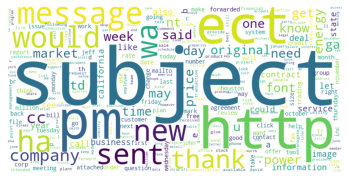

In [35]:
# total body
wc = WordCloud(
    # width=2200, height=2200,
      background_color='white',
          mode='RGB', 
      # mask=backgroud, # create mask for the workcloud
      max_words=500,
      stopwords=set(['email','enroncom','enron','please','s']),
      # font_path='C:\Windows\Fonts\STZHONGS.ttf',
      max_font_size=150,
      # relative_scaling=1, =
      random_state=50, 
      scale=2,
      collocations=False 
      ).generate(df_body.sum())
    
  # image_color = ImageColorGenerator(backgroud) # set cloud color
  # wc.recolor(color_func=image_color)

plt.imshow(wc) 
plt.axis('off') 
plt.show()

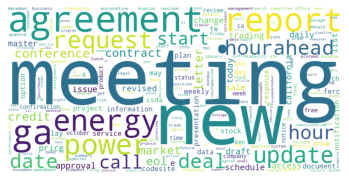

In [36]:
# total subject
wc = WordCloud(
    # width=2200, height=2200,
      background_color='white',
          mode='RGB', 
      # mask=backgroud, # create mask for the workcloud
      max_words=500,
      stopwords=set(['email','enroncom','enron','fwd','fw','wd','please','s']),
      # font_path='C:\Windows\Fonts\STZHONGS.ttf',
      max_font_size=150,
      # relative_scaling=1, =
      random_state=50, 
      scale=2,
      collocations=False 
      ).generate(df_subject.sum())
  
# image_color = ImageColorGenerator(backgroud) # set cloud color
# wc.recolor(color_func=image_color)

plt.imshow(wc) 
plt.axis('off') 
plt.show()

enron.com


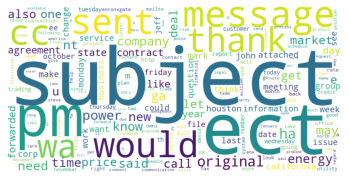

aol.com


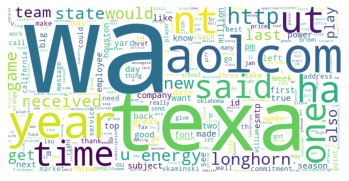

hotmail.com


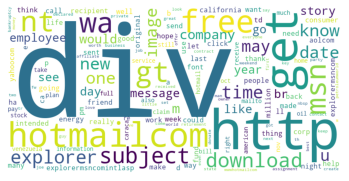

mailman.enron.com


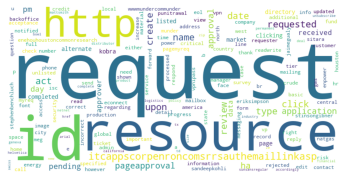

yahoo.com


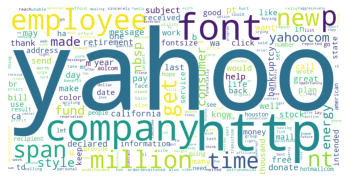

nymex.com


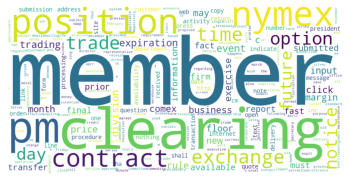

ccomad3.uu.commissioner.com


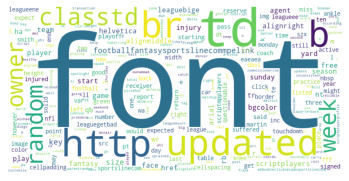

haas.berkeley.edu


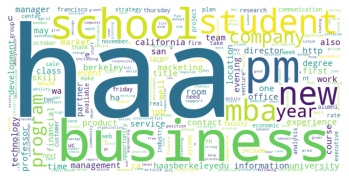

txu.com


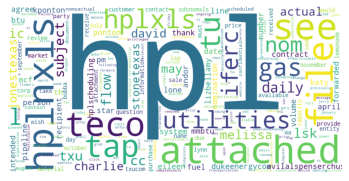

caiso.com


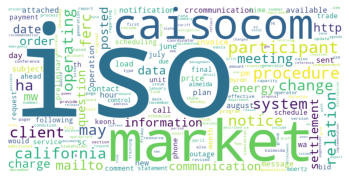

In [54]:
# bodies
for i in range(10):
  print(x.iloc[i])
  wc = WordCloud(
      # width=2200, height=2200,
        background_color='white',
            mode='RGB', 
        # mask=backgroud, # create mask for the workcloud
        max_words=500,
        stopwords=set(['email','enroncom','enron','please','s']),
        # font_path='C:\Windows\Fonts\STZHONGS.ttf',
        max_font_size=150,
        # relative_scaling=1, =
        random_state=50, 
        scale=2,
        collocations=False 
        ).generate(df_body.iloc[i])
    
  # image_color = ImageColorGenerator(backgroud) # set cloud color
  # wc.recolor(color_func=image_color)

  plt.imshow(wc) 
  plt.axis('off') 
  plt.show()
# wc.to_file('test1_ciyun.jpg') 

enron.com


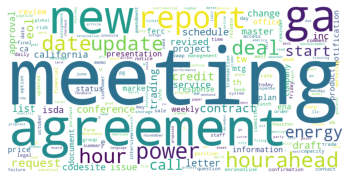

aol.com


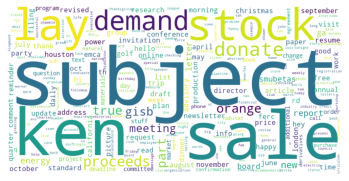

hotmail.com


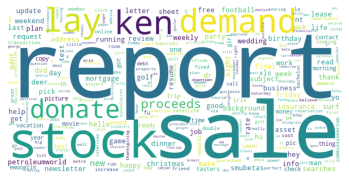

mailman.enron.com


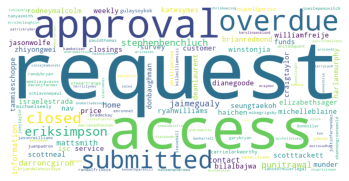

yahoo.com


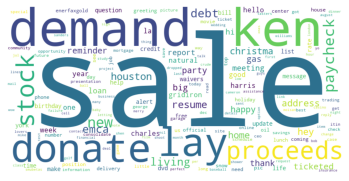

nymex.com


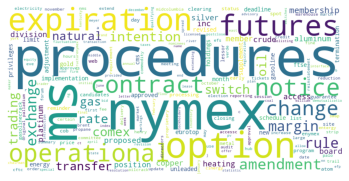

ccomad3.uu.commissioner.com


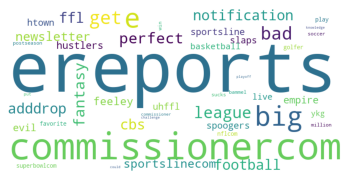

haas.berkeley.edu


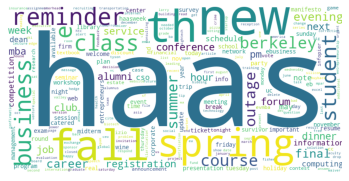

txu.com


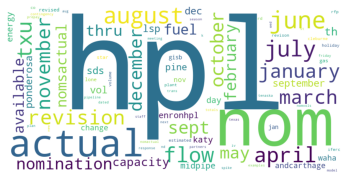

caiso.com


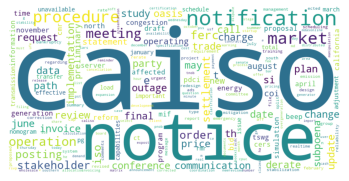

In [55]:
# subject
for i in range(10):
  print(x.iloc[i])
  wc = WordCloud(
      # width=2200, height=2200,
        background_color='white',
            mode='RGB', 
        # mask=backgroud, # create mask for the workcloud
        max_words=500,
        stopwords=set(['email','enroncom','enron','fwd','fw','wd','please','s']),
        # font_path='C:\Windows\Fonts\STZHONGS.ttf',
        max_font_size=150,
        # relative_scaling=1, =
        random_state=50, 
        scale=2,
        collocations=False 
        ).generate(df_subject.iloc[i])
    
  # image_color = ImageColorGenerator(backgroud) # set cloud color
  # wc.recolor(color_func=image_color)

  plt.imshow(wc) 
  plt.axis('off') 
  plt.show()
# wc.to_file('test1_ciyun.jpg') 

## Line plot

In [39]:
from datetime import datetime as dt

In [40]:
df['Date_new'] = pd.to_datetime(df['Date'], errors='coerce')

In [41]:
df['week'] = df['Date_new'].apply(lambda date: date.weekday())
df['year'] = df['Date_new'].apply(lambda date: date.year)
df['hour'] = df['Date_new'].apply(lambda date: date.hour)

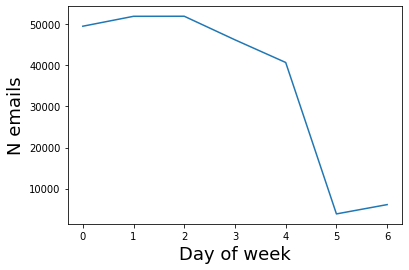

In [42]:
# Monday is zero
ax = df.groupby(df['week'])['body'].count().plot()
ax.set_xlabel('Day of week', fontsize=18)
ax.set_ylabel('N emails', fontsize=18);

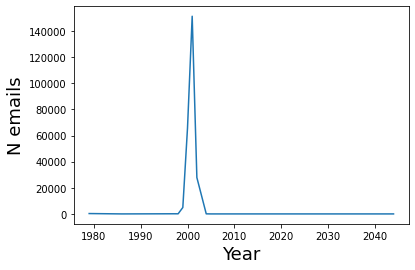

In [43]:
ax = df.groupby(df['year'])['body'].count().plot()
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('N emails', fontsize=18);

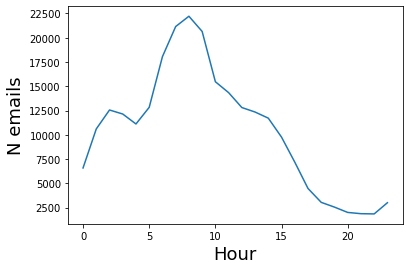

In [44]:
ax = df.groupby(df['hour'])['body'].count().plot()
ax.set_xlabel('Hour', fontsize=18)
ax.set_ylabel('N emails', fontsize=18);

# Barplot

### Top highest email sender

In [45]:
import seaborn as sns

In [46]:
top_20 = pd.DataFrame(df['X-From'].value_counts()[:20])
top_20.reset_index(inplace=True)
top_20.columns = ["From_name", "Counts"]

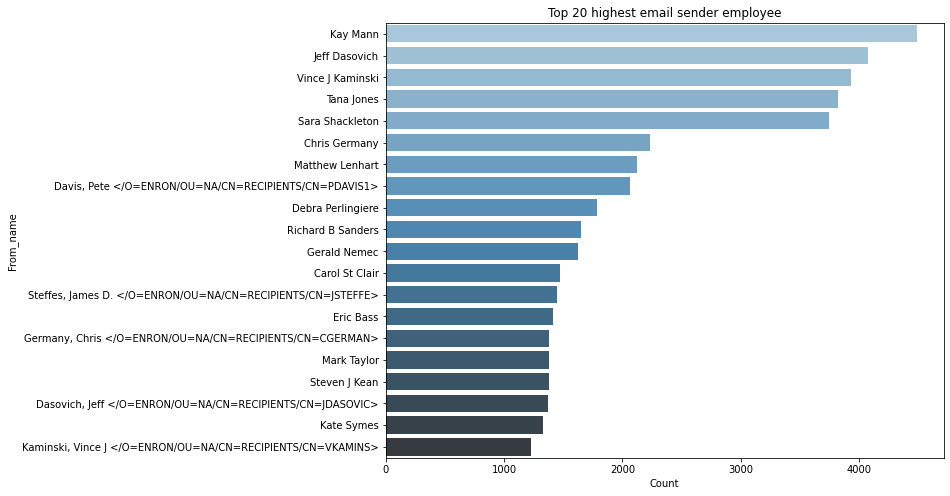

In [47]:
plt.figure(figsize=(10,8))

sns.barplot(y="From_name", x="Counts", data=top_20, palette="Blues_d")
plt.title("Top 20 highest email sender employee")
plt.xlabel("Count")
plt.ylabel("From_name")
plt.show()

In [48]:
top_20 = pd.DataFrame(df['From'].value_counts()[:20])
top_20.reset_index(inplace=True)
top_20.columns = ["From_email", "Counts"]

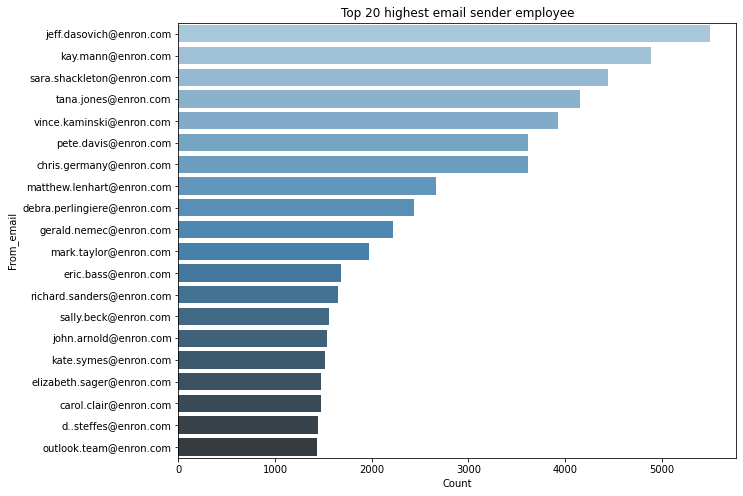

In [49]:
plt.figure(figsize=(10,8))

sns.barplot(y="From_email", x="Counts", data=top_20, palette="Blues_d")
plt.title("Top 20 highest email sender employee")
plt.xlabel("Count")
plt.ylabel("From_email")
plt.show()

In [ ]:
def split_recipients(s):
  s_list = s.replace('/n',',').replace('/',',').split(',') if str(s) != 'nan' else []
  res = []
  for email in s_list:
    if '@' in email:
      res.append(email.strip())
  return res

network_df = df[['From','To']]
network_df['To'] = network_df['To'].apply(split_recipients)
network_df = network_df.explode('To')

In [51]:
network_df['counter'] =1       #initially, set that counter to 1.
network_df = network_df.groupby(['From', 'To'])['counter'].sum().reset_index()
network_df.sort_values(['counter'], ascending=False).head(10)

,From,To,counter
225403,pete.davis@enron.com,pete.davis@enron.com,3615
301816,vince.kaminski@enron.com,vkaminski@aol.com,1132
122623,jeff.dasovich@enron.com,susan.mara@enron.com,929
122435,jeff.dasovich@enron.com,paul.kaufman@enron.com,873
122487,jeff.dasovich@enron.com,richard.shapiro@enron.com,859
122115,jeff.dasovich@enron.com,james.steffes@enron.com,776
122211,jeff.dasovich@enron.com,karen.denne@enron.com,722
122079,jeff.dasovich@enron.com,harry.kingerski@enron.com,542
122577,jeff.dasovich@enron.com,skean@enron.com,527
122535,jeff.dasovich@enron.com,sandra.mccubbin@enron.com,498


In [52]:
graph = nx.from_pandas_edgelist(network_df, 'From', 'To', edge_attr = 'counter', create_using=nx.DiGraph())
print('Number of nodes: %d, Number of edges: %d' % (graph.number_of_nodes(), graph.number_of_edges()))

Number of nodes: 79418, Number of edges: 307529


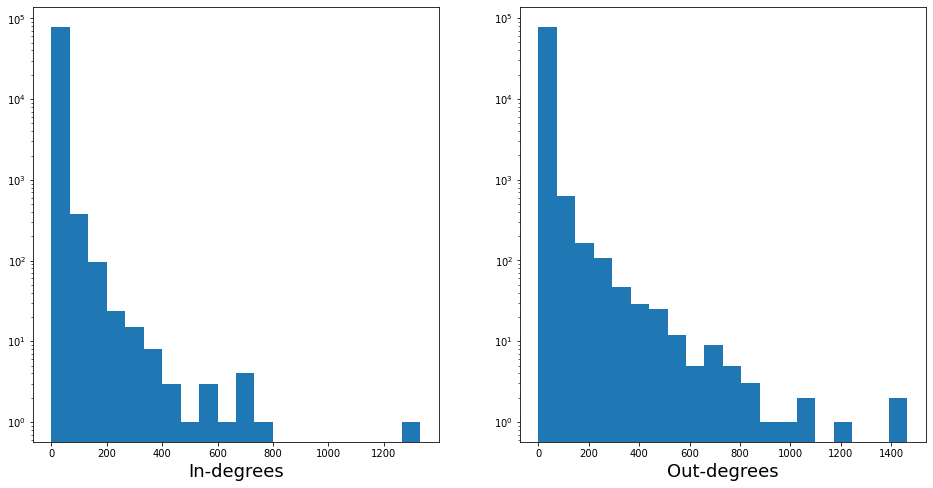

In [53]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 8))
ax1.hist([degree[1] for degree in graph.in_degree(weight='count')], log=True, bins=20)
ax1.set_xlabel('In-degrees', fontsize=18)

ax2.hist([degree[1] for degree in graph.out_degree(weight='count')], log=True, bins=20)
ax2.set_xlabel('Out-degrees', fontsize=18);